In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline

from imblearn.under_sampling import RandomUnderSampler

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# filter warning messages
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# import data set and create a data frame
df_dataset = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')

# dataset shape
df_dataset.shape
df_dataset.head(2)

(45000, 43)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN


In [3]:
# dataset summary
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [5]:
# percentage of missing values per feature
(df_dataset.isnull().sum() * 100 / df_dataset.shape[0]).round(2).sort_values(ascending=False)

target_fraud                                        96.62
last_borrowed_in_months                             66.57
last_amount_borrowed                                66.57
ok_since                                            58.99
external_data_provider_credit_checks_last_2_year    50.28
external_data_provider_credit_checks_last_year      33.61
credit_limit                                        30.67
n_issues                                            25.65
facebook_profile                                     9.91
marketing_channel                                    7.95
job_name                                             7.41
target_default                                       7.24
external_data_provider_email_seen_before             4.96
lat_lon                                              3.03
user_agent                                           1.60
n_bankruptcies                                       1.55
n_defaulted_loans                                    1.28
reason        

In [6]:
## target_default is the DV -> we all only the data which have DV for training and testing
df_dataset.dropna(subset=['target_default'], inplace=True)
df_dataset.shape

(41741, 43)

In [7]:
# drop the column "target_fraud" as the misiing % is very high
df_dataset.drop('target_fraud', axis=1, inplace=True)
df_dataset.shape

(41741, 42)

In [ ]:
#no. of unique values of the features
df_dataset.nunique().sort_values() 

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_default                                          2
last_borrowed_in_months                                 2
facebook_profile                                        2
external_data_provider_credit_checks_last_year          2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts                                             44
state         

In [12]:
df_dataset['channel'].isnull().sum()/df_dataset.shape[0]*100

np.float64(0.0)

In [ ]:
# drop the columns "channel" (0% missing and all the values are the same)
df_dataset.drop(labels=['channel'], axis=1, inplace=True)

In [14]:
df_dataset['external_data_provider_credit_checks_last_2_year'].isnull().sum()/df_dataset.shape[0]*100

np.float64(50.382118300951106)

In [16]:
# drop the columns "external_data_provider_credit_checks_last_2_year" (50% missing and remaining all are zero(no checks) -> meaning no data or no checks)
df_dataset.drop(labels=['external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)

In [17]:
# Columns that are not useful for training the data

df_dataset.drop(labels=['email', 'reason', 'zip', 'job_name', 'external_data_provider_first_name', 'lat_lon',
                       'shipping_zip_code', 'user_agent', 'profile_tags', 'marketing_channel',
                       'profile_phone_number', 'application_time_applied', 'ids'], axis=1, inplace=True)

In [18]:
# show descriptive statistics
df_dataset.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,28632.000000,4.174100e+04,17276.000000,41606.000000,41729.000000,41741.000000,30818.000000,41741.000000,41741.000000,27720.000000,39656.000000,41741.000000,41741.0
mean,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,33877.220453,7.108012e+04,35.192174,0.076696,0.004625,10.639108,11.023882,247.748545,1.504396,0.504185,12.731188,500.491771,inf
std,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,36141.985884,5.225978e+04,21.629577,0.274820,0.080157,4.588175,4.596036,146.326172,1.114207,0.499992,125.711218,287.993121,NaN
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,403.0
25%,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,9975.000000,4.401958e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,1.000000,0.000000,11.000000,252.000000,50910.0
50%,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,25213.000000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,2.000000,1.000000,27.000000,502.000000,101623.0
75%,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,46492.500000,8.503289e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,2.000000,1.000000,43.000000,747.000000,151248.0
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,inf


In [19]:
# count of "inf" values in "reported_income"
np.isinf(df_dataset['reported_income']).sum()

np.int64(66)

In [20]:
# count of values = -999 (special values) in "external_data_provider_email_seen_before"
df_dataset.loc[df_dataset['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'].value_counts()

external_data_provider_email_seen_before
-999.0    591
Name: count, dtype: int64

In [21]:
# Lets replace "inf" and "-999" values with "nan"
df_dataset['reported_income'] = df_dataset['reported_income'].replace(np.inf, np.nan)
df_dataset.loc[df_dataset['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'] = np.nan

In [25]:
# dataset summary
print(df_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41741 entries, 0 to 44999
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   41741 non-null  object 
 1   score_1                                          41741 non-null  object 
 2   score_2                                          41741 non-null  object 
 3   score_3                                          41741 non-null  float64
 4   score_4                                          41741 non-null  float64
 5   score_5                                          41741 non-null  float64
 6   score_6                                          41741 non-null  float64
 7   risk_rate                                        41741 non-null  float64
 8   last_amount_borrowed                             14133 non-null  float64
 9   last_borrowed_in_months          

In [22]:
df_dataset.head(2)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,state,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,444,2,0.0,51.0,645,57849.0,BR-MT
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,346,1,0.0,17.0,243,4902.0,BR-RS


In [30]:
# dataset containing numerical features
df_dataset_numerical = df_dataset.select_dtypes(
    include=['int64', 'float64']
)
df_dataset_numerical.shape

(41741, 20)

<Axes: xlabel='score_3', ylabel='Count'>

Text(0.5, 1.0, 'score_3')

<Axes: xlabel='score_4', ylabel='Count'>

Text(0.5, 1.0, 'score_4')

<Axes: xlabel='score_5', ylabel='Count'>

Text(0.5, 1.0, 'score_5')

<Axes: xlabel='score_6', ylabel='Count'>

Text(0.5, 1.0, 'score_6')

<Axes: xlabel='risk_rate', ylabel='Count'>

Text(0.5, 1.0, 'risk_rate')

<Axes: xlabel='last_amount_borrowed', ylabel='Count'>

Text(0.5, 1.0, 'last_amount_borrowed')

<Axes: xlabel='last_borrowed_in_months', ylabel='Count'>

Text(0.5, 1.0, 'last_borrowed_in_months')

<Axes: xlabel='credit_limit', ylabel='Count'>

Text(0.5, 1.0, 'credit_limit')

<Axes: xlabel='income', ylabel='Count'>

Text(0.5, 1.0, 'income')

<Axes: xlabel='ok_since', ylabel='Count'>

Text(0.5, 1.0, 'ok_since')

<Axes: xlabel='n_bankruptcies', ylabel='Count'>

Text(0.5, 1.0, 'n_bankruptcies')

<Axes: xlabel='n_defaulted_loans', ylabel='Count'>

Text(0.5, 1.0, 'n_defaulted_loans')

<Axes: xlabel='n_accounts', ylabel='Count'>

Text(0.5, 1.0, 'n_accounts')

<Axes: xlabel='n_issues', ylabel='Count'>

Text(0.5, 1.0, 'n_issues')

<Axes: xlabel='application_time_in_funnel', ylabel='Count'>

Text(0.5, 1.0, 'application_time_in_funnel')

<Axes: xlabel='external_data_provider_credit_checks_last_month', ylabel='Count'>

Text(0.5, 1.0, 'external_data_provider_credit_checks_last_month')

<Axes: xlabel='external_data_provider_credit_checks_last_year', ylabel='Count'>

Text(0.5, 1.0, 'external_data_provider_credit_checks_last_year')

<Axes: xlabel='external_data_provider_email_seen_before', ylabel='Count'>

Text(0.5, 1.0, 'external_data_provider_email_seen_before')

<Axes: xlabel='external_data_provider_fraud_score', ylabel='Count'>

Text(0.5, 1.0, 'external_data_provider_fraud_score')

<Axes: xlabel='reported_income', ylabel='Count'>

Text(0.5, 1.0, 'reported_income')

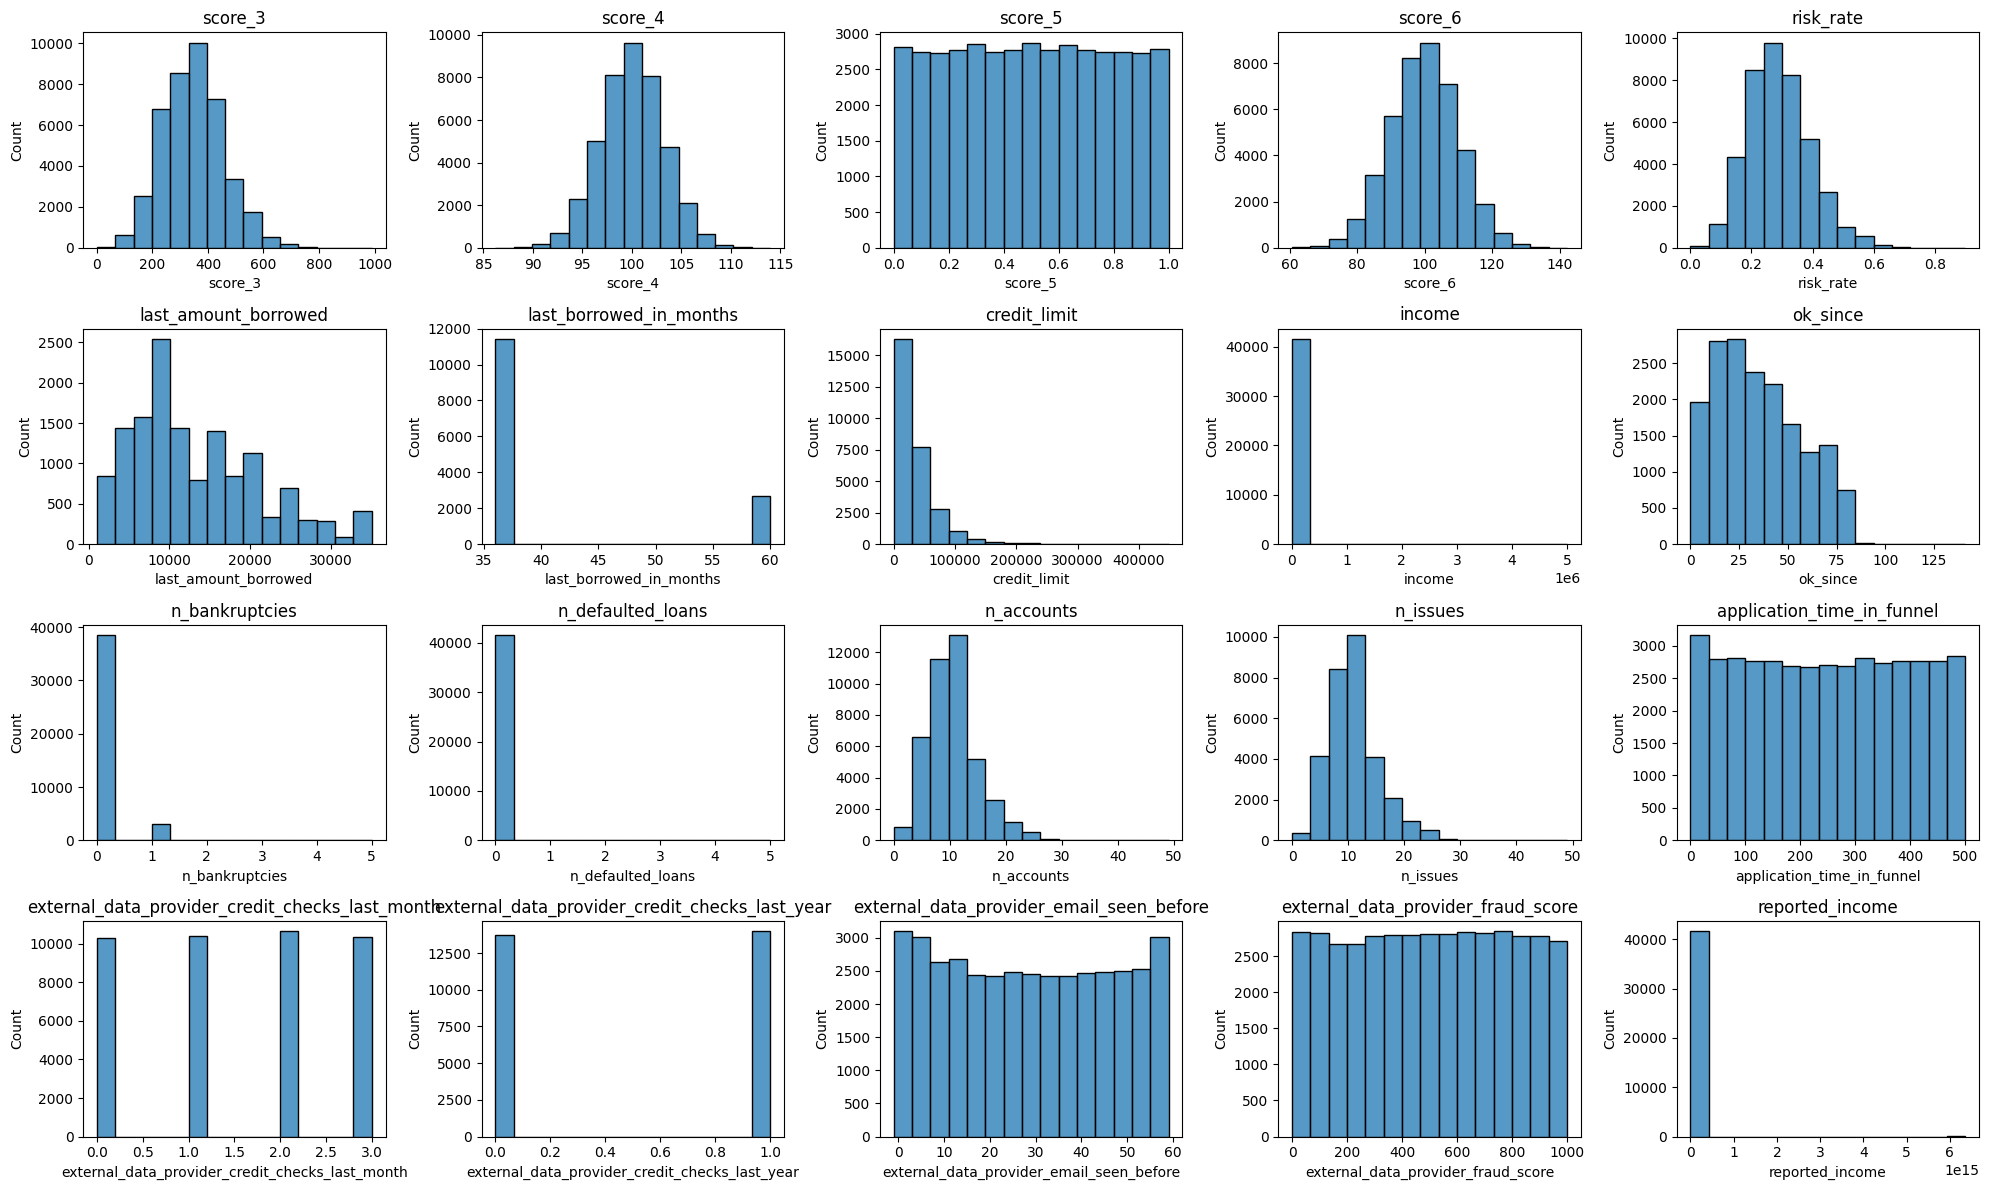

In [35]:
ncols = 5
nrows = int(np.ceil(len(df_dataset_numerical.columns) / ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 12))
ax = ax.flatten()  # makes indexing easy

for i, col in enumerate(df_dataset_numerical.columns):
    sns.histplot(
        df_dataset_numerical[col],
        bins=15,
        kde=False,
        ax=ax[i]
    )
    ax[i].set_title(col)

# remove empty subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [36]:
df_dataset_num = df_dataset.select_dtypes(exclude='object').columns
df_dataset_cat = df_dataset.select_dtypes(include='object').columns

# fill missing values for "last_amount_borrowed", "last_borrowed_in_months" and "n_issues" as 0  bcz not every client would have values assigned to these variables.
df_dataset['last_amount_borrowed'].fillna(value=0, inplace=True)
df_dataset['last_borrowed_in_months'].fillna(value=0, inplace=True)
df_dataset['n_issues'].fillna(value=0, inplace=True)

In [43]:
# fill missing values for numerical variables with median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_dataset.loc[:, df_dataset_num])
df_dataset.loc[:, df_dataset_num] = imputer.transform(df_dataset.loc[:, df_dataset_num])

In [44]:
# fill missing values for categorical variables with most recuuring
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_dataset.loc[:, df_dataset_cat])
df_dataset.loc[:, df_dataset_cat] = imputer.transform(df_dataset.loc[:, df_dataset_cat])

In [45]:
df_dataset.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

In [46]:
## Now converting cat values to numericals
df_dataset.shape

bin_var = df_dataset.nunique()[df_dataset.nunique() == 2].keys().tolist()
num_var = [col for col in  df_dataset.select_dtypes(['int', 'float']).columns.tolist() if col not in bin_var]
cat_var = [col for col in  df_dataset.select_dtypes(['object']).columns.tolist() if col not in bin_var]

bin_var
num_var
cat_var

(41741, 27)

['target_default',
 'facebook_profile',
 'external_data_provider_credit_checks_last_year']

['score_3',
 'score_4',
 'score_5',
 'score_6',
 'risk_rate',
 'last_amount_borrowed',
 'last_borrowed_in_months',
 'credit_limit',
 'income',
 'ok_since',
 'n_bankruptcies',
 'n_defaulted_loans',
 'n_accounts',
 'n_issues',
 'application_time_in_funnel',
 'external_data_provider_credit_checks_last_month',
 'external_data_provider_email_seen_before',
 'external_data_provider_fraud_score',
 'reported_income']

['score_1', 'score_2', 'state', 'real_state', 'shipping_state']

In [47]:
df_dataset_encoded = df_dataset.copy()

# label encoding for the binary variables
label_encoder = LabelEncoder()
for col in bin_var:
  df_dataset_encoded[col] = label_encoder.fit_transform(df_dataset_encoded[col])

# encoding with get_dummies for the categorical variables
df_dataset_encoded = pd.get_dummies(df_dataset_encoded, columns=cat_var)

df_dataset_encoded.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==,score_2_+2hzpeP1RWr8PEvL1WTUdw==,score_2_+CxEO4w7jv3QPI/BQbyqAA==,score_2_/tdlnWjXoZ3OjdtBXzdOJQ==,score_2_5/uMrqKj3OL/Xk5OrGx9fg==,score_2_55UK234RR1d7HIWJjmq9tw==,score_2_6J1ZMTzN5GKHXnhM4J1JbA==,score_2_7h+tk4z7O9brtBSe1rNjxA==,score_2_7h8PTkrlTWUPP3yuyP4rUg==,score_2_A+QuW1n/ABeiVVe/9CRZ9Q==,score_2_Fv28Bz0YRTVAT5kl1bAV6g==,score_2_IOVu8au3ISbo6+zmfnYwMg==,score_2_LCak332j+TYFqHC3NDwiqg==,score_2_NLvAOzzmJba/0zolQnWF5Q==,score_2_O4i7FxcROACMVTCgI0WXuA==,score_2_OlDYtdljgSSYM/M1L2CRaQ==,score_2_RO7MTL+j4PH2gNzbhNTq/A==,score_2_SaamrHMo23l/3TwXOWgVzw==,score_2_YLGMUI9hObSh6wD/xfanGg==,score_2_bopP0NxW3+r8tn9xIHTaOw==,score_2_cdpgyOyZS04uXerMNu7uCw==,score_2_d/7Hedyz7ovK9Pn1CYN4+A==,score_2_dCm9hFKfdRm7ej3jW+gyxw==,score_2_dWJRASUFMejk3AHZ1p1Gkg==,score_2_emS9xH8CLoRNie2uSmaDAQ==,score_2_ky19q4V1ZqgL3jnHX0wKDw==,score_2_mX2VRRG38RPiHX+MfjefRw==,score_2_osCzpM4hJrxugqWWuZmMWw==,score_2_pAzpxkhjPsjWldgSX21+zg==,score_2_rJZgTmANW3PjOCQLCcp4iQ==,score_2_tHpS8e9F8d9zg3iOQM9tsA==,score_2_tQUTfUyeuGkhRotd+6WjVg==,score_2_vJyc9xom9v7hwFMPTIpmKw==,score_2_w1miZqhB5+RSamEQJa0rqg==,score_2_wjdj2vxjWoDsEIk0l09ynw==,score_2_wkeCdGeu5sEv4/fjwR0aDg==,state_/+QaZYcpPt5mXLpkv6I8Bw==,state_/78Q+NAqnsdbiE2JReYK9Q==,state_/EoxQEzy1PWWTtv6DNwr2w==,state_/L8vvVesB5WyAv190Hw/rQ==,state_0gQEZgRHqS5KSF3oWQrQfw==,state_0lQuvmygO68ZFXZjzHEOww==,state_1DpYl6dtzY0qE33poow3iw==,state_1tPrGp5Yx4Yev8EWxfJw2w==,state_1vMmtGURgMcjxQbV2KQiUw==,state_1xxlFOWSFxK0/J2VdCKP3g==,state_5hPtRY8gW/3+fPXvGIgWTg==,state_7bX4XFXmYqoMspxup0CrKA==,state_82aTqSzrTImY+SbAOBQzGQ==,state_8ZKN5LHxobLWh6drCDlmhQ==,state_9PWmQ/Uv20r8XvcwDXWUSw==,state_9sS116y/1CqWLVJ8nFOGZg==,state_BB/zpwTH+8GCIVHlhzOU1Q==,state_DLK5rpOxZhCM5oQvfUpkTQ==,state_E8shyM/6btBNXXExsO17zw==,state_GFOaXqGcKJxSSF9aBDDNaA==,state_GW2VZ3dN3OGHSjQ6JkfqQw==,state_Jc0dzuliQSKFl0Xy0bjYCQ==,state_JrdZzPZEa/YIIGwh8OdTKA==,state_KET/Pmr6rHp1RJ/P9ymztw==,state_LXZkF0tV1Ma9JIlIvaUDiw==,state_NX0S6z5x5fEStwXfBQN5FQ==,state_OCoEDgPLpDjHcbEmPpAjvA==,state_P1TKs1aii8osbgO+MszZ2w==,state_QCVqG0wT4xPLQuiTIExO2w==,state_QMl/wADluYmoYZIXDOUktQ==,state_TYC58USu+Tq7c/WS4YLnuQ==,state_VafbDA6D5W2TpGMAUJbW8Q==,state_Ygq6MsM98oC8yceExr69Ig==,state_ZUmHOp1/xBWh5O/uqDutsw==,state_ZVfsutsd1Go0zZEnGp0vEA==,state_bNDXnbe7XAx/VUe+cbjDiw==,state_bwNrC22VlFOFk6/nEHQc6A==,state_cd+7k16vaf6SzwSyvT/fHw==,state_fMOpZ7DFhwQgTxW547UMCQ==,state_fR2lwAMjCb/fNXjsApiOTw==,state_kfFcVGcsJmH2n3eYprLkeQ==,state_orU7WJYGPT/xFwOXY1eBkw==,state_qItmSqWrjm+MopDA+UpKRw==,state_rrVbgRNTRyB6auEycsRrpA==,state_sjJbkqJS7cXalHLBFA+EOQ==,state_umkEte5GXWggFkMOtKQ3Ug==,state_x6Gw/1I8t3KPgT6s82Kodg==,state_xsd3ZdsI3356I3xMxZeiqQ==,state_ygE7OTdsxRMLeXMa0EZwZw==,state_yni6lL4oSly97UVZeRSyxA==,real_state_+qWF9pJpVGtTFn4vFjb/cg==,real_state_N5/CE7lSkAfB04hVFFwllw==,real_state_UX7AdFYgQh+VrVC5eIaU9w==,real_state_n+xK9CfX0bCn77lClTWviw==,real_state_nSpvDsIsslUaX6GE6m6eQA==,shipping_state_BR-AC,shipping_state_BR-AL,shipping_state_BR-AM,shipping_state_BR-AP,shipping_state_BR-BA,shipping_state_BR-CE,shipping_state_BR-DF,shipping_state_BR-ES,shipping_state_BR-GO,shipping_state_BR-MA,shipping_state_BR-MG,shipping_state_BR-MS,shipping_state_BR-MT,shipping_state_BR-PA,shipping_state_BR-PB,shipping_state_BR-PE,shipping_state_BR-PR,shipping_state_BR-RN,shipping_state_BR-RO,shipping_state_BR-RR,shipping_state_BR-RS,shipping_state_BR-SC,shippi

In [51]:
## Training the model

# feature matrix
X = df_dataset_encoded.drop('target_default', axis=1)

# target vector
y = df_dataset_encoded['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

In [52]:
# standardize the variables
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# resample
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [56]:
def validation_model(X, y, models_type, show=True):
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), models_type)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if show == True:
        print(f'Recall: {scores.mean()}, {scores.std()}')
        
    return scores.mean()

In [59]:
xgb = XGBClassifier()
lgb = LGBMClassifier()
cb = CatBoostClassifier()

model = []
recall = []

for models_type in (xgb, lgb, cb):
    print(models_type)
    model.append(models_type.__class__.__name__)
    recall.append(validation_model(X_train_rus, y_train_rus, models_type, show=False))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
LGBMClassifier()
[LightGBM] [Info] Number of positive: 3997, number of negative: 3996
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003489 seconds.
You can set `force_col_wise=true` to remove the o

,Recall
XGBClassifier,0.629702
LGBMClassifier,0.656322
CatBoostClassifier,NaN


In [62]:
import sklearn
import catboost

print(sklearn.__version__)
print(catboost.__version__)


1.8.0
1.2.8


In [66]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

pipeline = make_pipeline(
    StandardScaler(),
    CatBoostClassifier()
)

y_pred = cross_val_predict(pipeline, X_train_rus, y_train_rus)
print(confusion_matrix(y_train_rus, y_pred))

Learning rate set to 0.025026
0:	learn: 0.6884896	total: 6.06ms	remaining: 6.05s
1:	learn: 0.6839546	total: 10.7ms	remaining: 5.35s
2:	learn: 0.6800226	total: 15.4ms	remaining: 5.11s
3:	learn: 0.6759721	total: 21ms	remaining: 5.23s
4:	learn: 0.6723504	total: 25.9ms	remaining: 5.16s
5:	learn: 0.6687130	total: 30.7ms	remaining: 5.08s
6:	learn: 0.6654362	total: 35.8ms	remaining: 5.08s
7:	learn: 0.6622531	total: 40.7ms	remaining: 5.04s
8:	learn: 0.6592905	total: 45.2ms	remaining: 4.97s
9:	learn: 0.6562404	total: 50.5ms	remaining: 5s
10:	learn: 0.6534883	total: 55.1ms	remaining: 4.96s
11:	learn: 0.6508233	total: 59.9ms	remaining: 4.93s
12:	learn: 0.6483829	total: 64.9ms	remaining: 4.92s
13:	learn: 0.6459207	total: 70ms	remaining: 4.93s
14:	learn: 0.6437232	total: 74.6ms	remaining: 4.9s
15:	learn: 0.6418481	total: 79.3ms	remaining: 4.88s
16:	learn: 0.6406188	total: 83.2ms	remaining: 4.81s
17:	learn: 0.6386433	total: 88ms	remaining: 4.8s
18:	learn: 0.6371030	total: 91.8ms	remaining: 4.74s
19:

AttributeError: The following error was raised: 'CatBoostClassifier' object has no attribute '__sklearn_tags__'. It seems that there are no classes that implement `__sklearn_tags__` in the MRO and/or all classes in the MRO call `super().__sklearn_tags__()`. Make sure to inherit from `BaseEstimator` which implements `__sklearn_tags__` (or alternatively define `__sklearn_tags__` but we don't recommend this approach). Note that `BaseEstimator` needs to be on the right side of other Mixins in the inheritance order.